# Incidence du syndrôme grippal

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

In [2]:
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/incidence-PAY-3.csv", skiprows=1)

In [3]:
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202011          3  101704   93652.0  109756.0     154       142.0   
1     202010          3  104977   96650.0  113304.0     159       146.0   
2     202009          3  110696  102066.0  119326.0     168       155.0   
3     202008          3  143753  133984.0  153522.0     218       203.0   
4     202007          3  183610  172812.0  194408.0     279       263.0   
5     202006          3  206669  195481.0  217857.0     314       297.0   
6     202005          3  187957  177445.0  198469.0     285       269.0   
7     202004          3  122331  113492.0  131170.0     186       173.0   
8     202003          3   78413   71330.0   85496.0     119       108.0   
9     202002          3   53614   47654.0   59574.0      81        72.0   
10    202001          3   36850   31608.0   42092.0      56        48.0   
11    201952          3   28135   23220.0   33050.0      43        36.0   
12    201951          3   29786   25042.0   34530.0      45        38.0   
13    201950          3   34223   29156.0   39290.0      52        44.0   
14    201949          3   25662   21414.0   29910.0      39        33.0   
15    201948          3   22367   18055.0   26679.0      34        27.0   
16    201947          3   18669   14759.0   22579.0      28        22.0   
17    201946          3   16030   12567.0   19493.0      24        19.0   
18    201945          3   10138    7160.0   13116.0      15        10.0   
19    201944          3    7822    5010.0   10634.0      12         8.0   
20    201943          3    9487    6448.0   12526.0      14         9.0   
21    201942          3    7747    5243.0   10251.0      12         8.0   
22    201941          3    7122    4720.0    9524.0      11         7.0   
23    201940          3    8505    5784.0   11226.0      13         9.0   
24    201939          3    7091    4462.0    9720.0      11         7.0   
25    201938          3    4897    2891.0    6903.0       7         4.0   
26    201937          3    3172    1367.0    4977.0       5         2.0   
27    201936          3    2295     728.0    3862.0       3         1.0   
28    201935          3    1010       2.0    2018.0       2         0.0   
29    201934          3    1672     279.0    3065.0       3         1.0   
...      ...        ...     ...       ...       ...     ...         ...   
1816  198521          3   26096   19621.0   32571.0      47        35.0   
1817  198520          3   27896   20885.0   34907.0      51        38.0   
1818  198519          3   43154   32821.0   53487.0      78        59.0   
1819  198518          3   40555   29935.0   51175.0      74        55.0   
1820  198517          3   34053   24366.0   43740.0      62        44.0   
1821  198516          3   50362   36451.0   64273.0      91        66.0   
1822  198515          3   63881   45538.0   82224.0     116        83.0   
1823  198514          3  134545  114400.0  154690.0     244       207.0   
1824  198513          3  197206  176080.0  218332.0     357       319.0   
1825  198512          3  245240  223304.0  267176.0     445       405.0   
1826  198511          3  276205  252399.0  300011.0     501       458.0   
1827  198510          3  353231  326279.0  380183.0     640       591.0   
1828  198509          3  369895  341109.0  398681.0     670       618.0   
1829  198508          3  389886  359529.0  420243.0     707       652.0   
1830  198507          3  471852  432599.0  511105.0     855       784.0   
1831  198506          3  565825  518011.0  613639.0    1026       939.0   
1832  198505          3  637302  592795.0  681809.0    1155      1074.0   
1833  198504          3  424937  390794.0  459080.0     770       708.0   
1834  198503          3  213901  174689.0  253113.0     388       317.0   
1835  198502          3   97586   80949.0  114223.0     177       147.0   
1836  198501          3   85489   65918.0  105060.0     155       120.0   
1837  198452          3   84830  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1609  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1609        FR   France

Nous supprimons une ligne qui ne contient pas de données valables.

In [5]:
data = raw_data.dropna().copy()

In [6]:
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202011          3  101704   93652.0  109756.0     154       142.0   
1     202010          3  104977   96650.0  113304.0     159       146.0   
2     202009          3  110696  102066.0  119326.0     168       155.0   
3     202008          3  143753  133984.0  153522.0     218       203.0   
4     202007          3  183610  172812.0  194408.0     279       263.0   
5     202006          3  206669  195481.0  217857.0     314       297.0   
6     202005          3  187957  177445.0  198469.0     285       269.0   
7     202004          3  122331  113492.0  131170.0     186       173.0   
8     202003          3   78413   71330.0   85496.0     119       108.0   
9     202002          3   53614   47654.0   59574.0      81        72.0   
10    202001          3   36850   31608.0   42092.0      56        48.0   
11    201952          3   28135   23220.0   33050.0      43        36.0   
12    201951          3   29786   25042.0   34530.0      45        38.0   
13    201950          3   34223   29156.0   39290.0      52        44.0   
14    201949          3   25662   21414.0   29910.0      39        33.0   
15    201948          3   22367   18055.0   26679.0      34        27.0   
16    201947          3   18669   14759.0   22579.0      28        22.0   
17    201946          3   16030   12567.0   19493.0      24        19.0   
18    201945          3   10138    7160.0   13116.0      15        10.0   
19    201944          3    7822    5010.0   10634.0      12         8.0   
20    201943          3    9487    6448.0   12526.0      14         9.0   
21    201942          3    7747    5243.0   10251.0      12         8.0   
22    201941          3    7122    4720.0    9524.0      11         7.0   
23    201940          3    8505    5784.0   11226.0      13         9.0   
24    201939          3    7091    4462.0    9720.0      11         7.0   
25    201938          3    4897    2891.0    6903.0       7         4.0   
26    201937          3    3172    1367.0    4977.0       5         2.0   
27    201936          3    2295     728.0    3862.0       3         1.0   
28    201935          3    1010       2.0    2018.0       2         0.0   
29    201934          3    1672     279.0    3065.0       3         1.0   
...      ...        ...     ...       ...       ...     ...         ...   
1816  198521          3   26096   19621.0   32571.0      47        35.0   
1817  198520          3   27896   20885.0   34907.0      51        38.0   
1818  198519          3   43154   32821.0   53487.0      78        59.0   
1819  198518          3   40555   29935.0   51175.0      74        55.0   
1820  198517          3   34053   24366.0   43740.0      62        44.0   
1821  198516          3   50362   36451.0   64273.0      91        66.0   
1822  198515          3   63881   45538.0   82224.0     116        83.0   
1823  198514          3  134545  114400.0  154690.0     244       207.0   
1824  198513          3  197206  176080.0  218332.0     357       319.0   
1825  198512          3  245240  223304.0  267176.0     445       405.0   
1826  198511          3  276205  252399.0  300011.0     501       458.0   
1827  198510          3  353231  326279.0  380183.0     640       591.0   
1828  198509          3  369895  341109.0  398681.0     670       618.0   
1829  198508          3  389886  359529.0  420243.0     707       652.0   
1830  198507          3  471852  432599.0  511105.0     855       784.0   
1831  198506          3  565825  518011.0  613639.0    1026       939.0   
1832  198505          3  637302  592795.0  681809.0    1155      1074.0   
1833  198504          3  424937  390794.0  459080.0     770       708.0   
1834  198503          3  213901  174689.0  253113.0     388       317.0   
1835  198502          3   97586   80949.0  114223.0     177       147.0   
1836  198501          3   85489   65918.0  105060.0     155       120.0   
1837  198452          3   84830  

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year,week)
    return pd.Period(w.day(0), 'W')

In [8]:
data['period'] = [convert_week(yw) for yw in data['week']]

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
sorted_data

week  indicator     inc   inc_low    inc_up  inc100  \
period                                                                         
1984-10-29/1984-11-04  198444          3   68422   20056.0  116788.0     125   
1984-11-05/1984-11-11  198445          3  135223  101414.0  169032.0     246   
1984-11-12/1984-11-18  198446          3   87330   67686.0  106974.0     159   
1984-11-19/1984-11-25  198447          3   72029   54274.0   89784.0     131   
1984-11-26/1984-12-02  198448          3   78620   60634.0   96606.0     143   
1984-12-03/1984-12-09  198449          3  101073   81684.0  120462.0     184   
1984-12-10/1984-12-16  198450          3  123680  101401.0  145959.0     225   
1984-12-17/1984-12-23  198451          3  101726   80242.0  123210.0     185   
1984-12-24/1984-12-30  198452          3   84830   60602.0  109058.0     154   
1984-12-31/1985-01-06  198501          3   85489   65918.0  105060.0     155   
1985-01-07/1985-01-13  198502          3   97586   80949.0  114223.0     177   
1985-01-14/1985-01-20  198503          3  213901  174689.0  253113.0     388   
1985-01-21/1985-01-27  198504          3  424937  390794.0  459080.0     770   
1985-01-28/1985-02-03  198505          3  637302  592795.0  681809.0    1155   
1985-02-04/1985-02-10  198506          3  565825  518011.0  613639.0    1026   
1985-02-11/1985-02-17  198507          3  471852  432599.0  511105.0     855   
1985-02-18/1985-02-24  198508          3  389886  359529.0  420243.0     707   
1985-02-25/1985-03-03  198509          3  369895  341109.0  398681.0     670   
1985-03-04/1985-03-10  198510          3  353231  326279.0  380183.0     640   
1985-03-11/1985-03-17  198511          3  276205  252399.0  300011.0     501   
1985-03-18/1985-03-24  198512          3  245240  223304.0  267176.0     445   
1985-03-25/1985-03-31  198513          3  197206  176080.0  218332.0     357   
1985-04-01/1985-04-07  198514          3  134545  114400.0  154690.0     244   
1985-04-08/1985-04-14  198515          3   63881   45538.0   82224.0     116   
1985-04-15/1985-04-21  198516          3   50362   36451.0   64273.0      91   
1985-04-22/1985-04-28  198517          3   34053   24366.0   43740.0      62   
1985-04-29/1985-05-05  198518          3   40555   29935.0   51175.0      74   
1985-05-06/1985-05-12  198519          3   43154   32821.0   53487.0      78   
1985-05-13/1985-05-19  198520          3   27896   20885.0   34907.0      51   
1985-05-20/1985-05-26  198521          3   26096   19621.0   32571.0      47   
...                       ...        ...     ...       ...       ...     ...   
2019-08-19/2019-08-25  201934          3    1672     279.0    3065.0       3   
2019-08-26/2019-09-01  201935          3    1010       2.0    2018.0       2   
2019-09-02/2019-09-08  201936          3    2295     728.0    3862.0       3   
2019-09-09/2019-09-15  201937          3    3172    1367.0    4977.0       5   
2019-09-16/2019-09-22  201938          3    4897    2891.0    6903.0       7   
2019-09-23/2019-09-29  201939          3    7091    4462.0    9720.0      11   
2019-09-30/2019-10-06  201940          3    8505    5784.0   11226.0      13   
2019-10-07/2019-10-13  201941          3    7122    4720.0    9524.0      11   
2019-10-14/2019-10-20  201942          3    7747    5243.0   10251.0      12   
2019-10-21/2019-10-27  201943          3    9487    6448.0   12526.0      14   
2019-10-28/2019-11-03  201944          3    7822    5010.0   10634.0      12   
2019-11-04/2019-11-10  201945          3   10138    7160.0   13116.0      15   
2019-11-11/2019-11-17  201946          3   16030   12567.0   19493.0      24   
2019-11-18/2019-11-24  201947          3   18669   14759.0   22579.0      28   
2019-11-25/2019-12-01  201948          3   22367   18055.0   26679.0      34   
2019-12-02/2019-12-08  201949          3   25662   21414.0   29910.0      39   
2019-12-09/2019-12-15  201950          3   34223   29156.0   39290.0      52   
2019-12-16/2019-12-22  20

In [13]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print (p1,p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Ceci est la semaine 19 de l'année 1989 qui manque dans le jeu de données.

In [15]:
sorted_data['inc'][0]

68422

Toute la colonne 'inc' est représentée par des chaînes de caracètre à cause du trait dans la ligne de la semaine 19 de l'année 1989.

In [17]:
sorted_data['inc'] = sorted_data['inc'].astype(int)

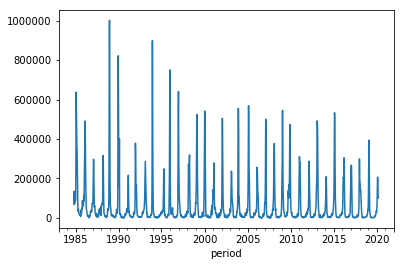

In [21]:
sorted_data['inc'].plot()

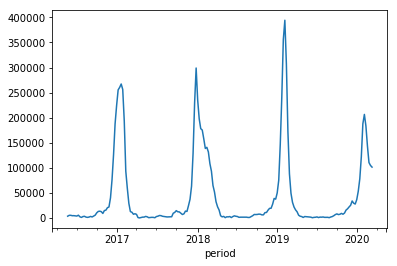

In [22]:
sorted_data['inc'][-200:].plot()